## Linear regression model for the sale price of homes


Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

Load all the [data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) from three tables:
- Real Property Sales 
- Residential Building 
- Parcel 

In [2]:
df = pd.read_csv("data/processed/residential.csv")

/Users/karenwarmbein/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Turn strings into integers for the model.
Calculate the age of the house.

In [80]:
df['zipcode'];

In [5]:
df['age'] = 2019 - df['yrbuilt']

## Can we model square foot of living with price?

Create a model with one predictor, for practice.

In [81]:
df_reduced0 = df[['sqfttotliving']]
X = df_reduced0
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1440.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          3.18e-279
Time:                        16:55:28   Log-Likelihood:                -79881.
No. Observations:                5339   AIC:                         1.598e+05
Df Residuals:                    5337   BIC:                         1.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.703e+04   2.28e+04      1.184      0.237   -1.77e+04    7.18e+04
sqfttotliving   377.3949      9.944     37.950      0.000     357.900     396.890
==============================================================================
Omnibus:                     9563.679   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20014205.191
Skew:                          12.660   Prob(JB):                         0.00
Kurtosis:                     301.877   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

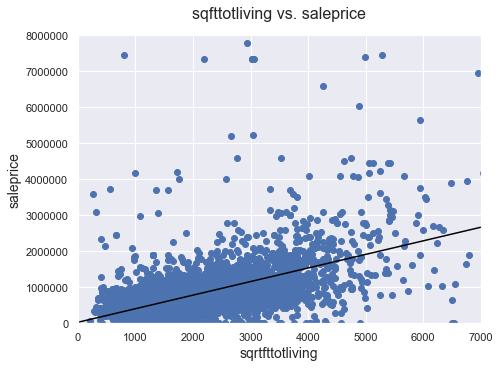

In [86]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('sqfttotliving vs. saleprice', fontsize=16)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([0,7000])
axes.set_ylim([0,8000000])
plt.scatter(df['sqfttotliving'], df['saleprice'])
llist = range(10000)
plt.plot(llist, model.params[0]+list*model.params[1], c='black')
plt.xlabel('sqrtfttotliving', fontsize=14)
plt.ylabel('saleprice', fontsize=14)
plt.show()

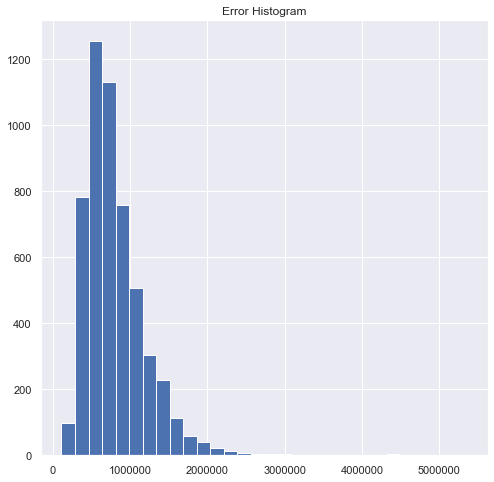

In [88]:
plt.title("Error Histogram")
plt.hist(model.fittedvalues, bins=30); 

## Adding more features to the model
Create a new feature with the total area of a porch.

In [15]:
df_open_plus_closed_porch = df['sqftenclosedporch'] + df['sqftopenporch']

In [90]:
df = pd.concat([df, df_open_plus_closed_porch], axis=1)
df.rename(columns={0:"open_plus_closed_porch"}, inplace=True)

In [91]:
# df.drop(['open_plus_closed_porch'], axis=1, inplace=True)

Here is the code to make zipcode an integer.

In [92]:
df['zipcode'] = df['zipcode'].astype(str) #cast data as a string
df['zipcode'] = df['zipcode'].str.slice(stop=5) #only use first 5 numbers in zipcode (eliminate 00000-0000)
df['zipcode'] = np.where(df['zipcode'] == ' ' , 0, df['zipcode'])
df['zipcode_int'] = df['zipcode'].astype(int) #cast as integer
df['zipcode_int']

0       98053
1       98042
2       98027
3       98027
4       98038
        ...  
5334    98108
5335    98065
5336    98144
5337    98075
5338    98023
Name: zipcode_int, Length: 5339, dtype: int64

In [94]:
# combinations of predictors

#start with: 'sqfttotliving','open_plus_closed_porch','wfntfootage','trafficnoise'
#r^2 = .277

#'sqfttotliving','open_plus_closed_porch','wfntfootage','trafficnoise','zipcode_int'
#r^2 = .234

#'sqfttotliving','wfntfootage','trafficnoise'
#r^2 = 0.232

#'sqfttotliving','wfntfootage','trafficnoise','bldggrade'
#.271

#'sqfttotliving','wfntfootage','bldggrade','open_plus_closed_porch'
.272


list_reduced = ['sqfttotliving','wfntfootage','bldggrade']
df_reduced = df[list_reduced]
X = df_reduced4
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
#predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     660.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:06:00   Log-Likelihood:                -79675.
No. Observations:                5339   AIC:                         1.594e+05
Df Residuals:                    5335   BIC:                         1.594e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.979e+05      1e+04     79.547      0.000    7.78e+05    8.18e+05
sqfttotliving  1.982e+05   1.51e+04     13.101      0.000    1.69e+05    2.28e+05
wfntfootage    1.205e+05      1e+04     11.992      0.000    1.01e+05     1.4e+05
bldggrade       2.54e+05   1.51e+04     16.799      0.000    2.24e+05    2.84e+05
==============================================================================
Omnibus:                     9483.654   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19244668.295
Skew:                          12.434   Prob(JB):                         0.00
Kurtosis:                     296.071   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
errors = model.fittedvalues

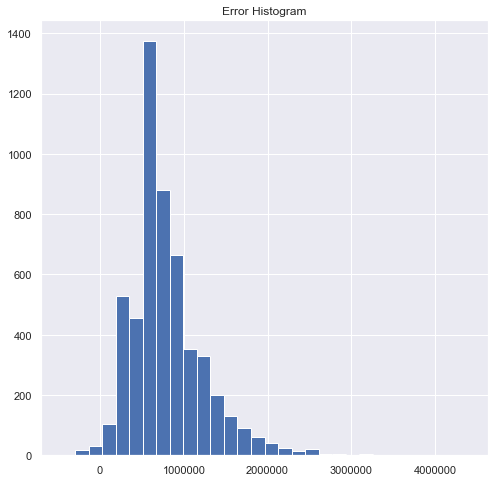

In [96]:
plt.title("Error Histogram")
plt.hist(errors, bins=30);

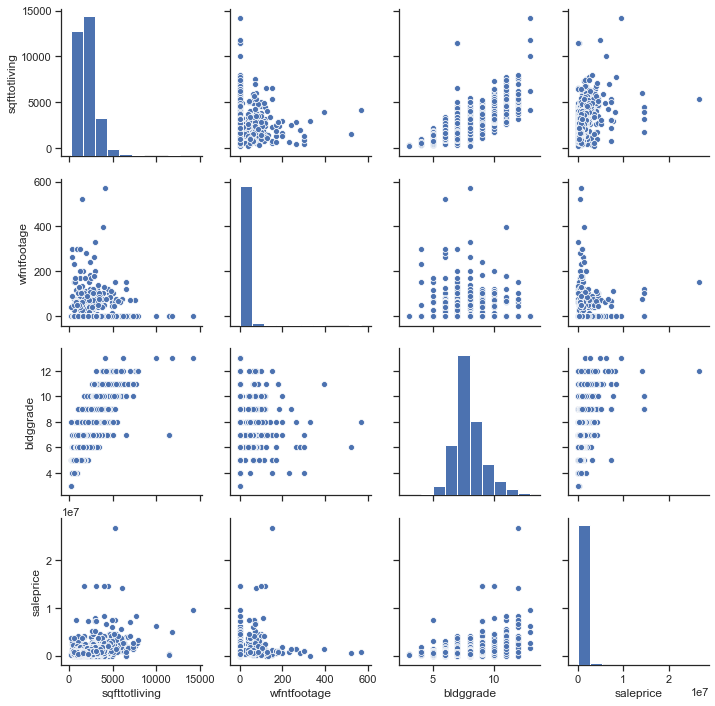

In [97]:
df_test = pd.concat([df_reduced, df['saleprice']], axis=1)
sns.set(style="ticks");
sns.pairplot(df_test)

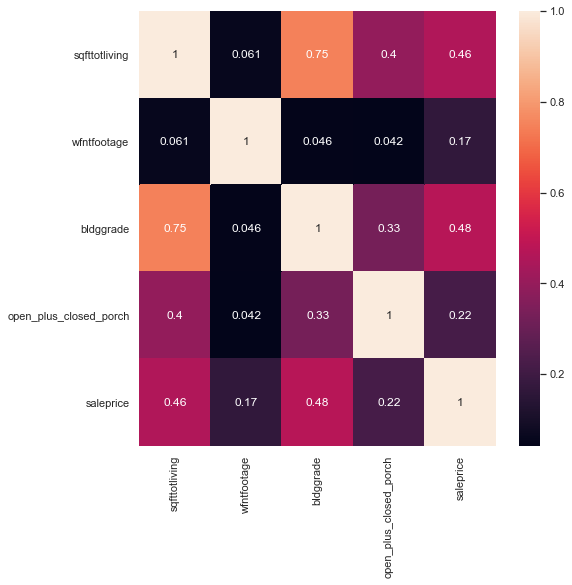

In [98]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.heatmap(df_test4.corr(), annot=True);

In [ ]:
# Linearity
# - homoscedasticity (constant variance) of the errors
# - normality of the error distribution
# - statistical independence of the errors (in particular, no correlation between consecutive errors)